In [1]:
!pip install qiskit

     |████████████████████████████████| 6.0MB 10.0MB/s 
     |████████████████████████████████| 18.0MB 219kB/s 
     |████████████████████████████████| 235kB 55.0MB/s 
     |████████████████████████████████| 215kB 24.1MB/s 
     |████████████████████████████████| 2.1MB 30.3MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 1.5MB 30.0MB/s 
     |████████████████████████████████| 194kB 44.6MB/s 
     |████████████████████████████████| 112kB 46.1MB/s 
     |████████████████████████████████| 614kB 32.6MB/s 
     |████████████████████████████████| 3.2MB 30.9MB/s 
     |████████████████████████████████| 6.3MB 31.6MB/s 
  Created wheel for qiskit: filename=qiskit-0.26.2-cp37-none-any.whl size=10506 sha256=51cc7e311fecc07502036fe968fc5e69fc7d1cbaa5516ccbf407187e63d3c7f3
  Stored in directory: /root/.cache/pip/wheels/89/89/34/524839952d5a58a7be9789e580bfc1ca883bf6579152444568
  Created wheel for python-constraint: filename=python_constraint-1.4.0

In [2]:
!git clone https://github.com/arnavdas88/QuGlassyIsing

Cloning into 'QuGlassyIsing'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (282/282), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 282 (delta 127), reused 226 (delta 80), pack-reused 0
Receiving objects: 100% (282/282), 2.13 MiB | 23.69 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [3]:
!mv QuGlassyIsing/research/pickle-files/ ./pickle

In [4]:
from qiskit.providers.aer import QasmSimulator  
from qiskit.providers.aer import AerSimulator
from qiskit import Aer, transpile
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA 
from qiskit.circuit.library import EfficientSU2
# opflow is Qiskit's module for creating operators like yours
from qiskit import *
from qiskit.opflow import OperatorBase
from qiskit.opflow import Z, X, I  # Pauli Z, X matrices and identity
import pylab
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import os
import pickle

In [5]:
file_list = []
for dirlist in os.walk('./pickle'):
    base, dir, files = dirlist
    if 'j=1' in base:
        for f in files:
            file_list += [os.path.join(base, f)]

print(file_list) 

['./pickle/2D Ising Model/j=1/AntiFerromagmetic/2D_Ising_Model_CountsAF3.kl', './pickle/2D Ising Model/j=1/AntiFerromagmetic/2D_Ising_Model_CountsAF1.pkl', './pickle/2D Ising Model/j=1/AntiFerromagmetic/2D_Ising_Model_CountsAF2.pkl', './pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS3.pkl', './pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS2.pkl', './pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS1.pkl']


In [6]:
print("Loading Optimization History")
counts_values = {}
for f in file_list:
    with open(f, 'rb') as handle:
        counts_values[f] = pickle.load(handle)


Loading Optimization History


In [7]:
list(counts_values.values())[0]

{'vqe_result': {'optimal_parameters': {ParameterVectorElement(θ[0]): -3.1746030798542333, ParameterVectorElement(θ[10]): -3.100635416244281, ParameterVectorElement(θ[11]): 6.328377883126882, ParameterVectorElement(θ[12]): 2.9164261352270766, ParameterVectorElement(θ[13]): -0.0037798946555328812, ParameterVectorElement(θ[14]): -3.0350271957058883, ParameterVectorElement(θ[15]): 3.166037002855905, ParameterVectorElement(θ[16]): 6.297030729554503, ParameterVectorElement(θ[17]): -3.108097885816586, ParameterVectorElement(θ[18]): -0.04585685172297921, ParameterVectorElement(θ[19]): -3.142182731729604, ParameterVectorElement(θ[1]): -0.05777967803668499, ParameterVectorElement(θ[20]): -4.7966215907963905, ParameterVectorElement(θ[21]): 6.360102167275139, ParameterVectorElement(θ[22]): 3.144073556477021, ParameterVectorElement(θ[23]): -0.005766496893526079, ParameterVectorElement(θ[24]): -2.9818101545752858, ParameterVectorElement(θ[25]): -0.02678563432074167, ParameterVectorElement(θ[26]): 0.

In [8]:
tempdata = [ v for v in counts_values.values() ]

In [12]:
def flatten(x): return sum(x, [])

def build_graph_data(x):
    sqrt = len(x)**(float(1)/2)
    sqrt = int(sqrt)
    if not sqrt**2 == len(x):
        raise Exception("not able to form a square")
    result = []
    xa = np.asarray([float(i) for i in x])
    return xa.reshape((sqrt, sqrt)), x


import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

def draw_graph(x, t):
    plt.figure(figsize=(7, 7))
    plt.title(t, pad=6.2, fontsize=18, wrap=True)
    plt.imshow(x, cmap='copper', interpolation='nearest', aspect='auto')
    # plt.xticks(X, X/10, label="Bx", rotation=90, fontsize=16)
    # plt.xlabel('Bx →', fontsize=24)
    # plt.yticks(Y, label="Bz", fontsize=16)
    # plt.ylabel('Bz →', fontsize=24)
    # plt.colorbar()
    # plt.savefig("Heatmap representing the change of `Minimum Ground State Energy` in Bx vs Bz.png", bbox_inches='tight', dpi=1080)
    plt.show()

def build_graph_data_from_list(x):
    for i in x:
        p, t = build_graph_data(i)
        draw_graph(p, t)

# 1st Max

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from qiskit.visualization import plot_histogram

def show_counts_data_1st(tempdata_i, max_val = 0):
    arr = tempdata_i['vqe_result']
    arr = arr['eigenstate']
    data = np.asarray(arr)
    # print(list(arr.keys()))
    arr = {a: arr[a] for a in arr if arr[a] == max(list(arr.values()))}
    # return plot_histogram(arr)
    return arr
    # return len(list(arr.keys()))

    # return data

./pickle/2D Ising Model/j=1/AntiFerromagmetic/2D_Ising_Model_CountsAF3.kl


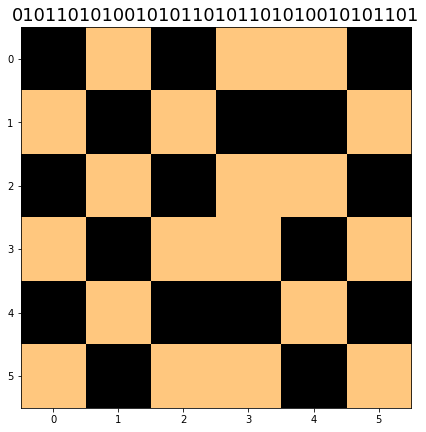

./pickle/2D Ising Model/j=1/AntiFerromagmetic/2D_Ising_Model_CountsAF2.pkl


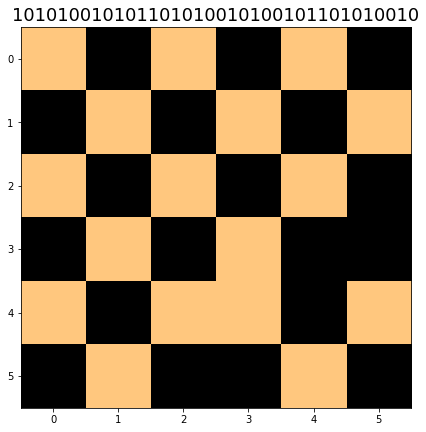

./pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS3.pkl


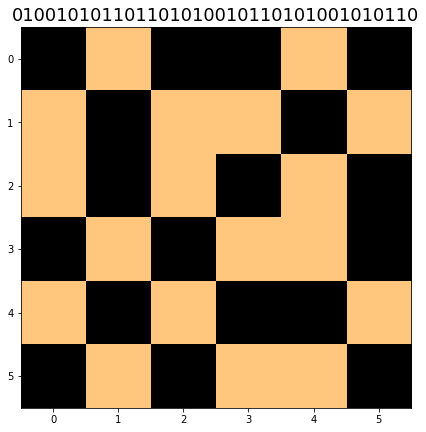

./pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS2.pkl


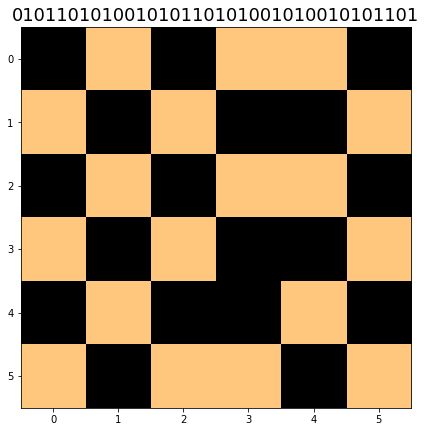

./pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS1.pkl


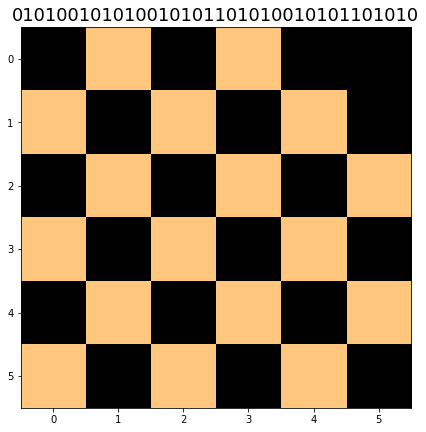

In [15]:
de = {  k: show_counts_data_2nd(v)  for k, v in counts_values.items() if not "AF1" in k }

for k, e in de.items():
    print(k)
    build_graph_data_from_list(list(e.keys()))

# 2nd Max

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from qiskit.visualization import plot_histogram

def max_2nd(x):
    x.remove(max(x))
    return max(x)

def show_counts_data_2nd(tempdata_i, max_val = 0):
    arr = tempdata_i['vqe_result']
    arr = arr['eigenstate']
    data = np.asarray(arr)
    # print(list(arr.keys()))
    arr = {a: arr[a] for a in arr if arr[a] == max_2nd(list(arr.values()))}
    # return plot_histogram(arr)
    return arr
    # return len(list(arr.keys()))

    # return data

./pickle/2D Ising Model/j=1/AntiFerromagmetic/2D_Ising_Model_CountsAF3.kl


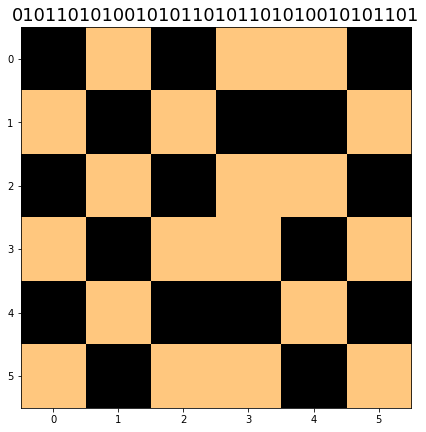

./pickle/2D Ising Model/j=1/AntiFerromagmetic/2D_Ising_Model_CountsAF2.pkl


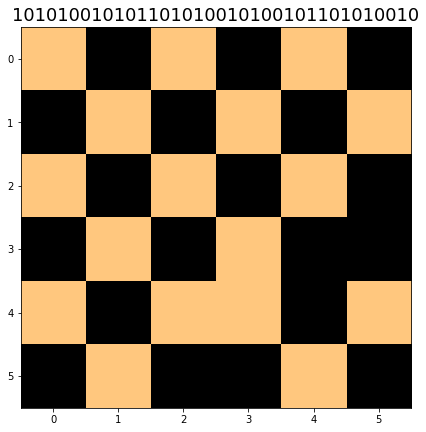

./pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS3.pkl


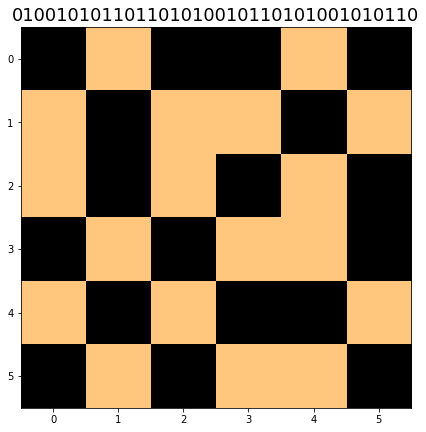

./pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS2.pkl


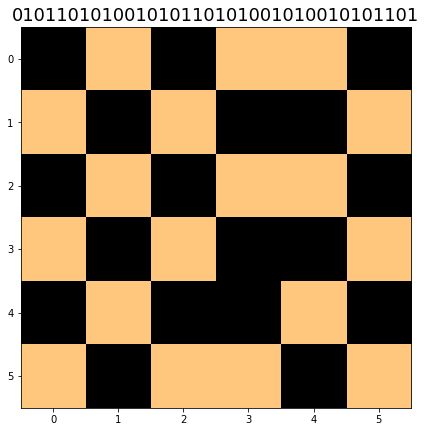

./pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS1.pkl


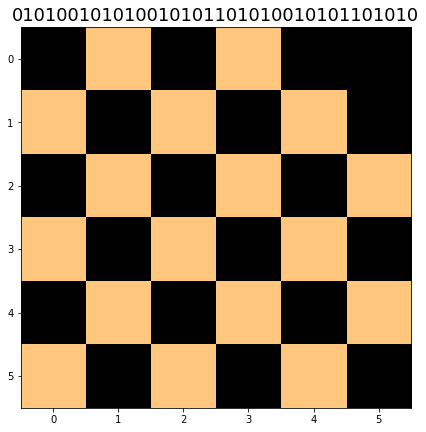

In [19]:
de = {  k: show_counts_data_2nd(v)  for k, v in counts_values.items() if not "AF1" in k }

for k, e in de.items():
    print(k)
    build_graph_data_from_list(list(e.keys()))

# 3rd Max

In [24]:

def max_3rd(x):
    x.remove(max(x))
    x.remove(max(x))
    return max(x)

def show_counts_data_3rd(tempdata_i, max_val = 0):
    arr = tempdata_i['vqe_result']
    arr = arr['eigenstate']
    data = np.asarray(arr)
    # print(list(arr.keys()))
    arr = {a: arr[a] for a in arr if arr[a] == max_3rd(list(arr.values()))}
    # return plot_histogram(arr)
    return arr

./pickle/2D Ising Model/j=1/AntiFerromagmetic/2D_Ising_Model_CountsAF3.kl


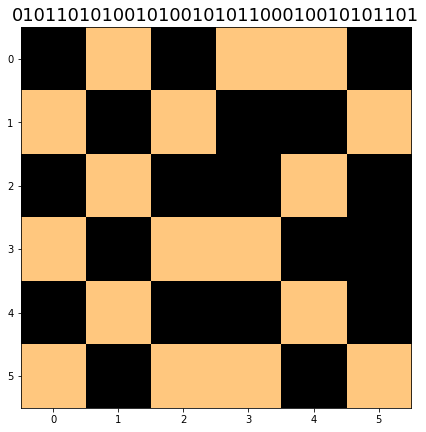

./pickle/2D Ising Model/j=1/AntiFerromagmetic/2D_Ising_Model_CountsAF2.pkl


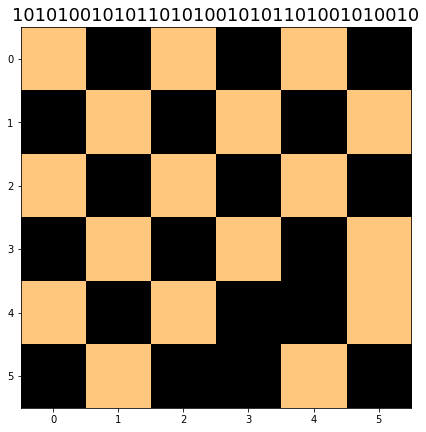

./pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS3.pkl


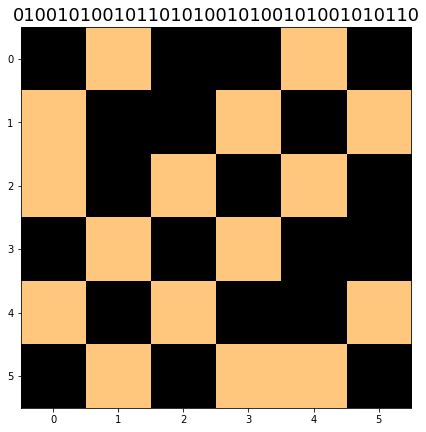

./pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS2.pkl


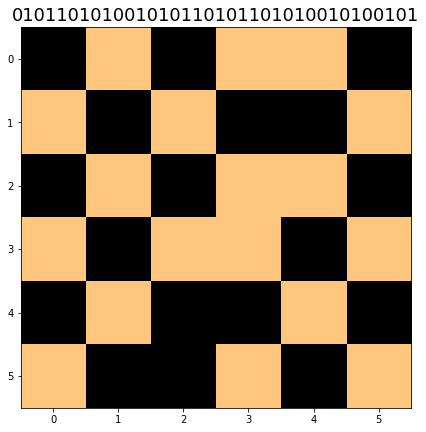

./pickle/2D Ising Model/j=1/Disordered/2D_Ising_Model_CountsDIS1.pkl


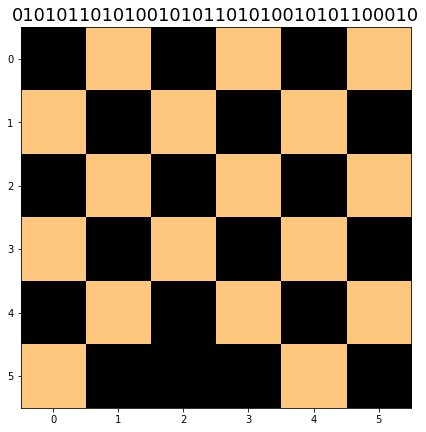

In [25]:
de = {  k: show_counts_data_3rd(v)  for k, v in counts_values.items()  if not "AF1" in k  }

for k, e in de.items():
    print(k)
    build_graph_data_from_list(list(e.keys()))